In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\erik1\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\erik1\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Analizando un texto

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text1.tokens[:10], len(text1.tokens)

(['[',
  'Moby',
  'Dick',
  'by',
  'Herman',
  'Melville',
  '1851',
  ']',
  'ETYMOLOGY',
  '.'],
 260819)

## Medida de riqueza léxica

formula: riqueza léxica = número de palabras unicas / número total de palabras

In [4]:
vocabulario = sorted(set(text1))
vocabulario[1000:1020]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed']

In [5]:
rl = len(vocabulario) / len(text1.tokens)
print(f'Diversidad léxica: {rl}')

Diversidad léxica: 0.07406285585022564


In [6]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario) / len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [7]:
def porcentaje_palabra(palabra, texto):
    return 100 * texto.count(palabra) / len(texto)

In [8]:
print(f'Porcentaje de la palabra "monster": {porcentaje_palabra("monster", text1)}')

Porcentaje de la palabra "monster": 0.018786974875296663


In [9]:
text1.count('monster')

49

## Estadistica del lenguaje

### Metodo FreqDist de NLTK

In [10]:
fdist = FreqDist(text1)

In [11]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

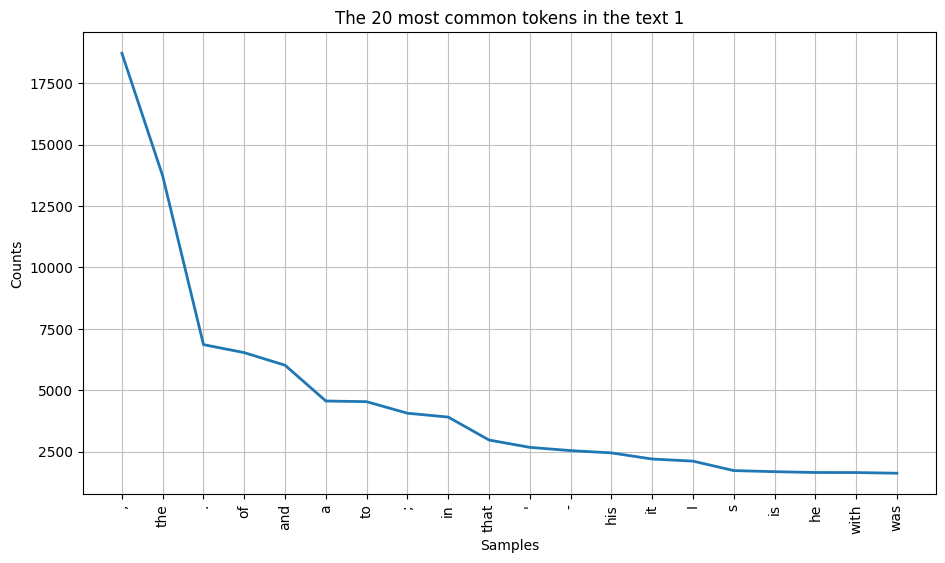

<Axes: title={'center': 'The 20 most common tokens in the text 1'}, xlabel='Samples', ylabel='Counts'>

In [12]:
plt.figure(figsize=(11, 6))

fdist.plot(20, title='The 20 most common tokens in the text 1')

In [13]:
fdist['monster']

49

## Distribución sobre contenido con filtro-fino

In [14]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
long_words[:10]

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons']

In [16]:
type(long_words)

list

In [17]:
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10], type(vocabulario_filtrado)

(['ACCOUNT',
  'ADDITIONAL',
  'ADVANCING',
  'ADVENTURES',
  'AFFGHANISTAN',
  'AFRICA',
  'AGAINST',
  'ALFRED',
  'ALGERINE',
  'AMERICA'],
 list)

In [18]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10]
dtypes = [('word', object), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')
palabras_interesantes[-30:]

array([('certain',  87), ('voyage',  93), ('strange',  96),
       ('nothing', 102), ('moment', 105), ('another', 106),
       ('towards', 107), ('captain', 112), ('called', 116),
       ('whaling', 116), ('between', 117), ('something', 119),
       ('against', 132), ('things', 132), ('thought', 149),
       ('CHAPTER', 150), ('without', 154), ('Pequod', 172),
       ('should', 181), ('almost', 186), ('Starbuck', 196),
       ('himself', 203), ('Captain', 215), ('through', 227),
       ('whales', 237), ('little', 247), ('Queequeg', 252),
       ('seemed', 283), ('before', 293), ('though', 335)],
      dtype=[('word', 'O'), ('frequency', '<i4')])

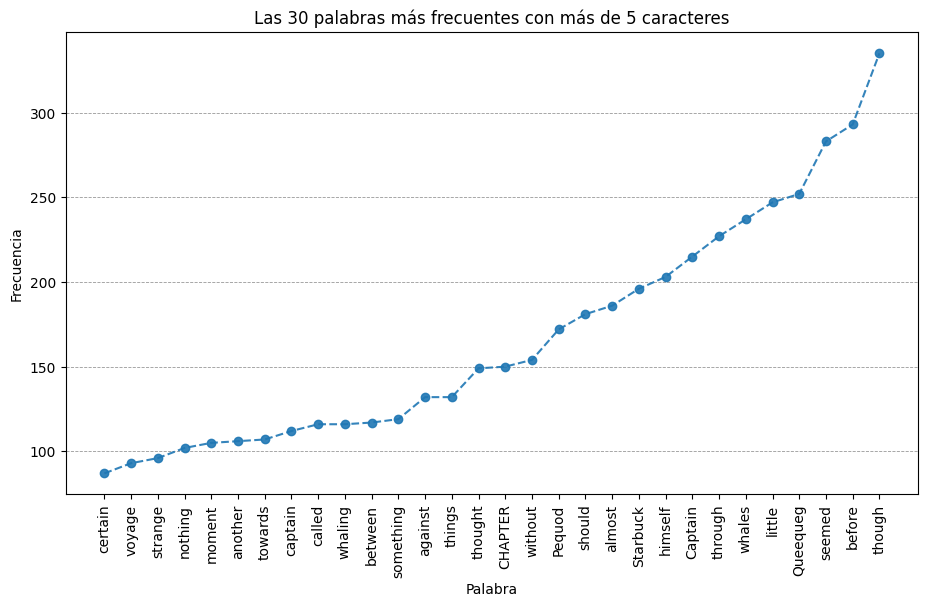

In [19]:
plt.figure(figsize=(11, 6))
plt.plot(
    palabras_interesantes['word'][-30:],
    palabras_interesantes['frequency'][-30:],
    marker='o',
    linestyle='--',
    alpha=0.9
)

plt.grid(True, alpha=0.4, linestyle='--', color='black', linewidth=0.6, axis='y', which='both', zorder=0)

plt.xticks(rotation=90)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Las 30 palabras más frecuentes con más de 5 caracteres')


plt.show()
